In [47]:
import numba as nb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy.interpolate import griddata
import os
import shutil
import moviepy as mpy

In [51]:
sie = pd.read_csv(f'Output/System 1/Sim 1.csv', header=0)
pow = pd.read_csv(f'Output/System 1/Sim 2.csv', header=0)
nfw = pd.read_csv(f'Output/System 1/Sim 3.csv', header=0)

In [52]:
sie['pos_rms'] = sie['pos_rms'].fillna(1)
pow['pos_rms'] = pow['pos_rms'].fillna(1)
nfw['pos_rms'] = nfw['pos_rms'].fillna(1)
sie['mag_rms'] = sie['mag_rms'].fillna(6000)
pow['mag_rms'] = pow['mag_rms'].fillna(6000)
nfw['mag_rms'] = nfw['mag_rms'].fillna(6000)

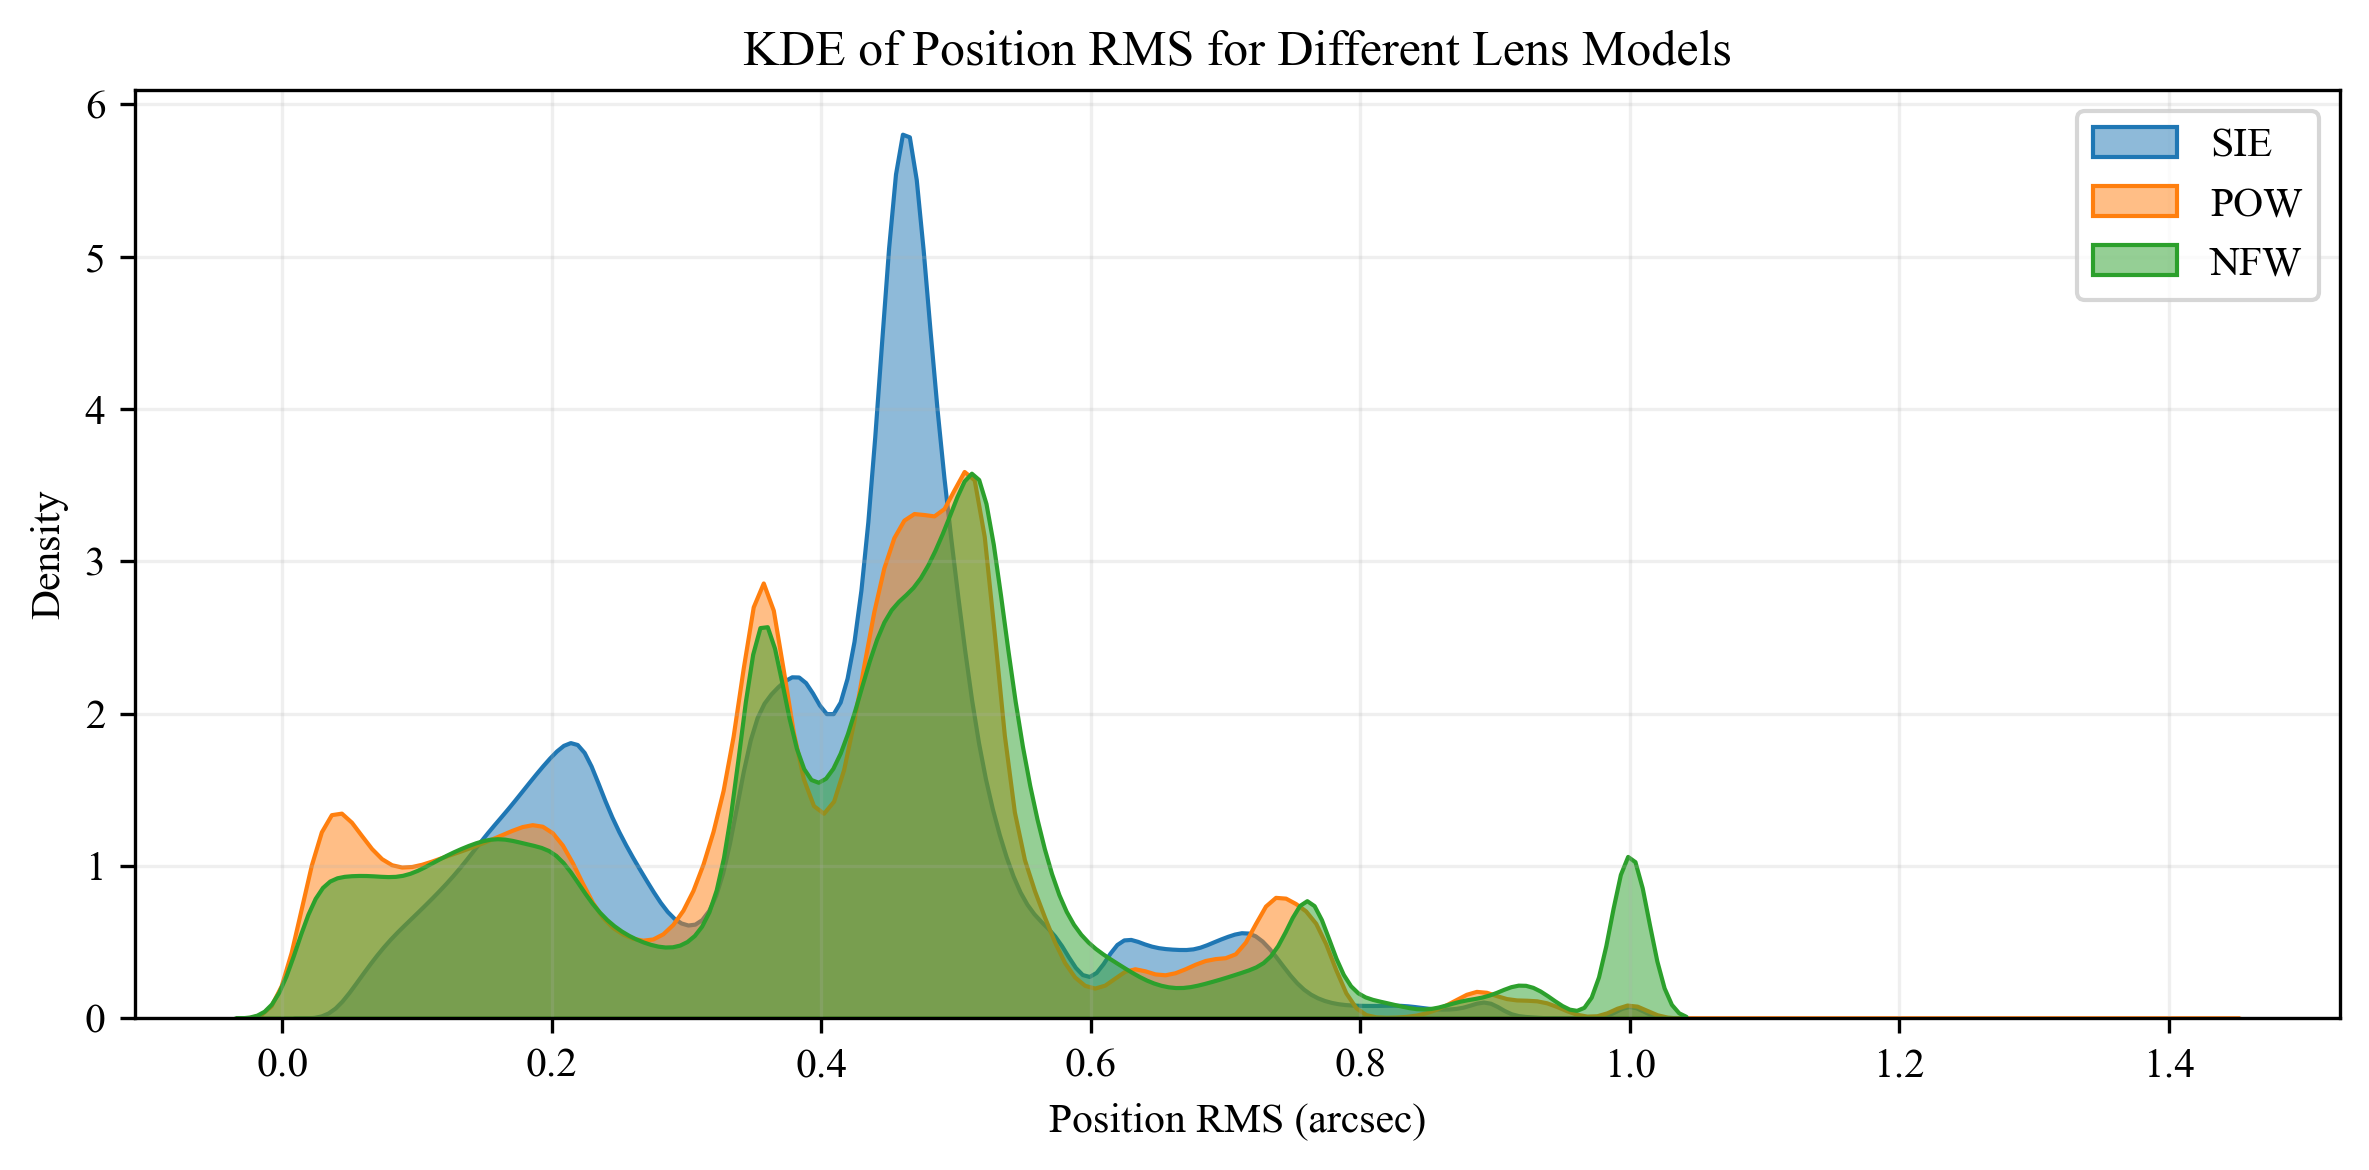

In [4]:
plt.figure(figsize=(8, 4))
sns.kdeplot(sie['pos_rms'], label='SIE', fill=True, alpha=0.5)
sns.kdeplot(pow['pos_rms'], label='POW', fill=True, alpha=0.5)
sns.kdeplot(nfw['pos_rms'], label='NFW', fill=True, alpha=0.5)
plt.xlabel('Position RMS (arcsec)')
plt.ylabel('Density')
plt.title('KDE of Position RMS for Different Lens Models')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

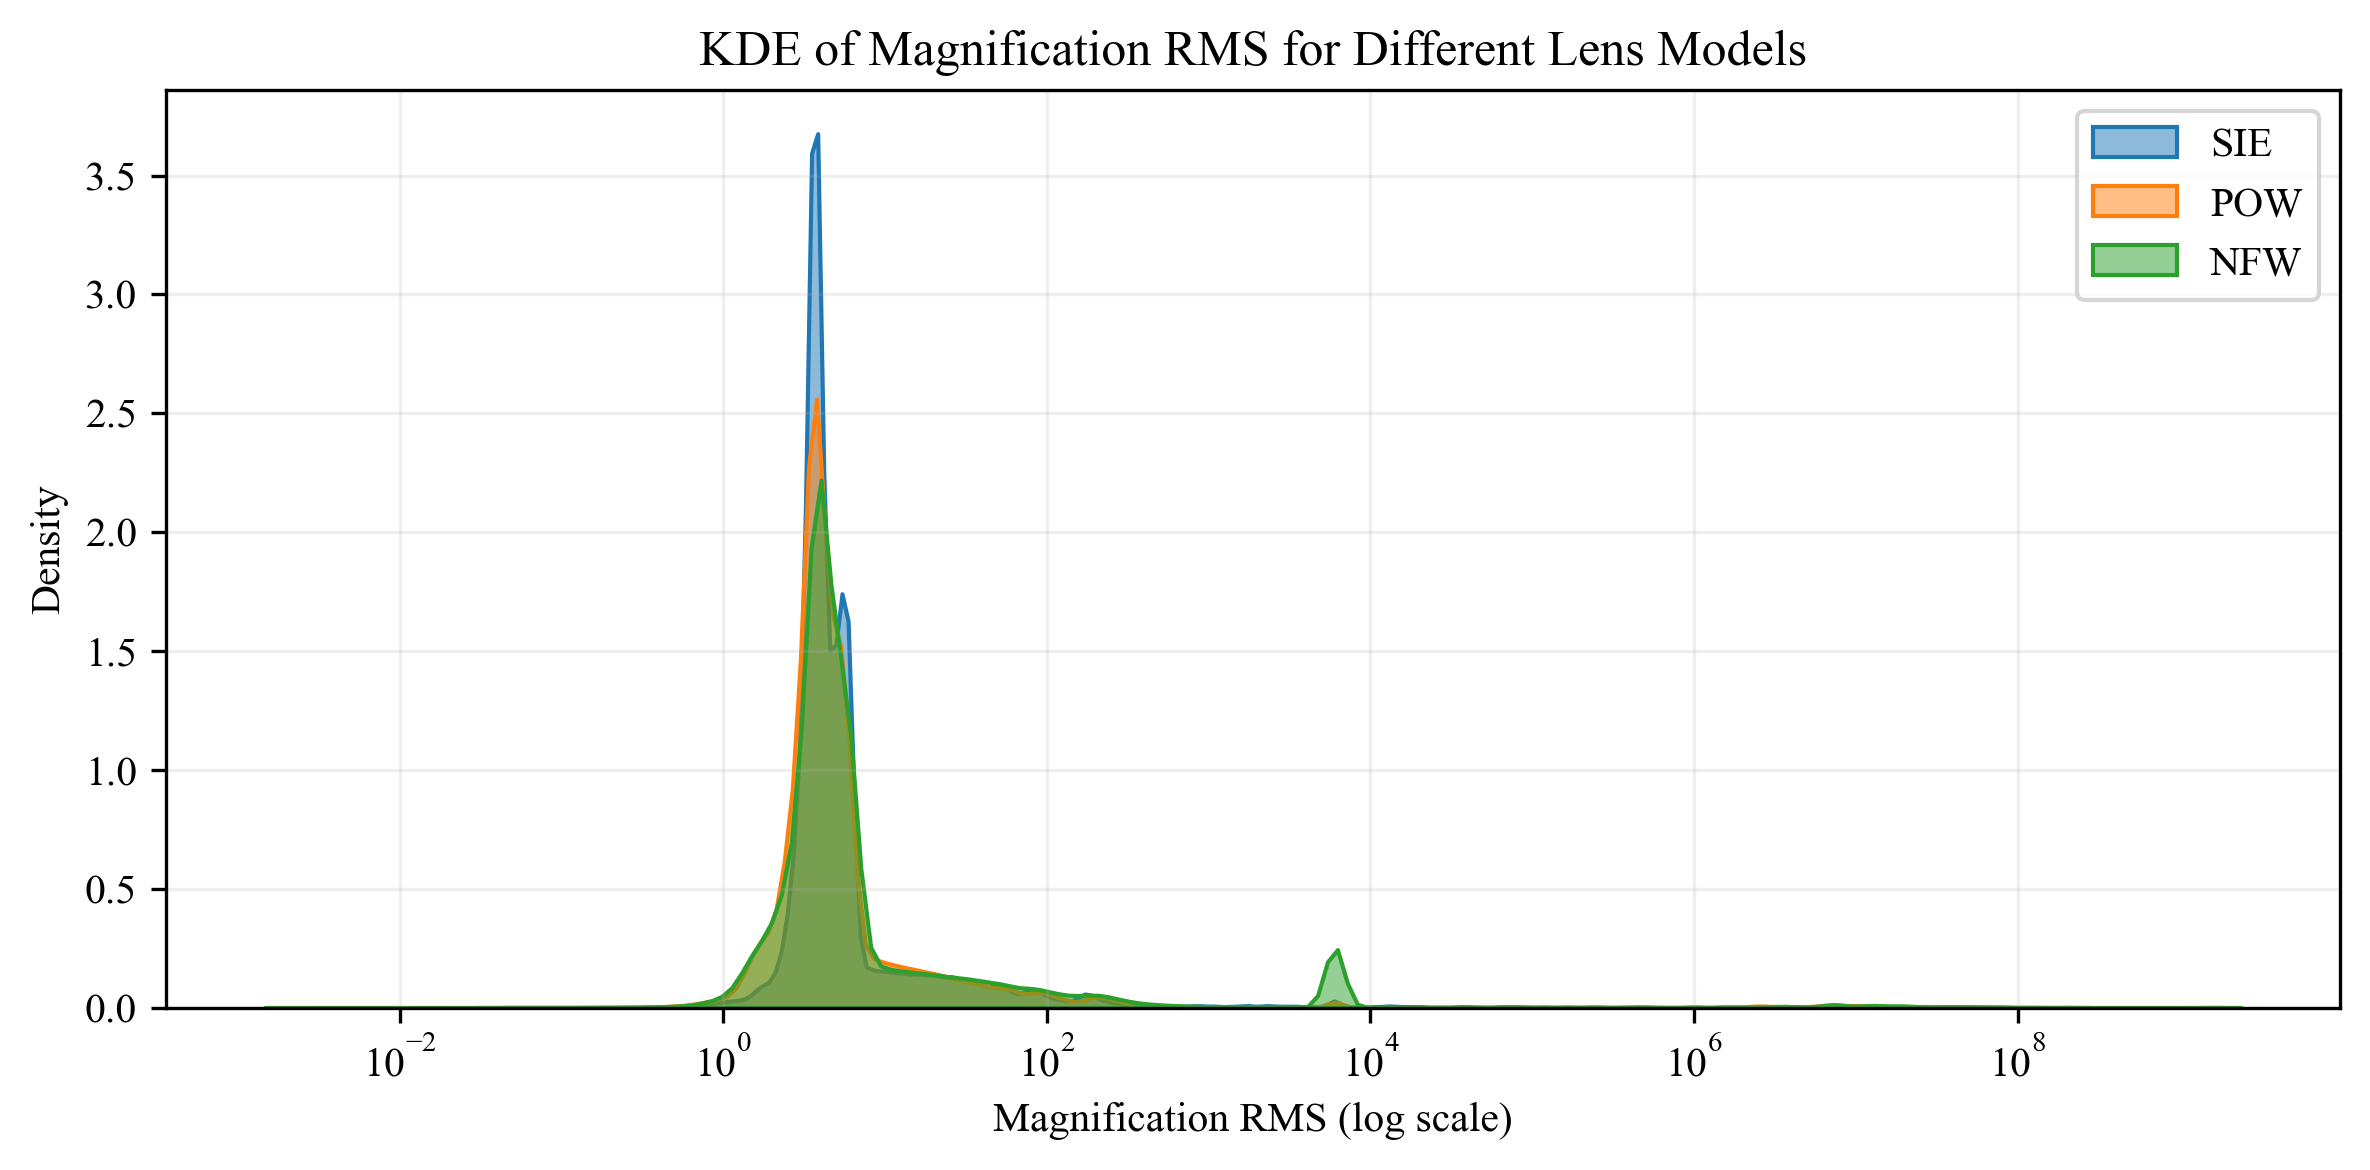

In [5]:
plt.figure(figsize=(8, 4))
sns.kdeplot(sie['mag_rms'], label='SIE', fill=True, alpha=0.5, log_scale=True)
sns.kdeplot(pow['mag_rms'], label='POW', fill=True, alpha=0.5, log_scale=True)
sns.kdeplot(nfw['mag_rms'], label='NFW', fill=True, alpha=0.5, log_scale=True)
plt.xlabel('Magnification RMS (log scale)')
plt.ylabel('Density')
plt.title('KDE of Magnification RMS for Different Lens Models')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

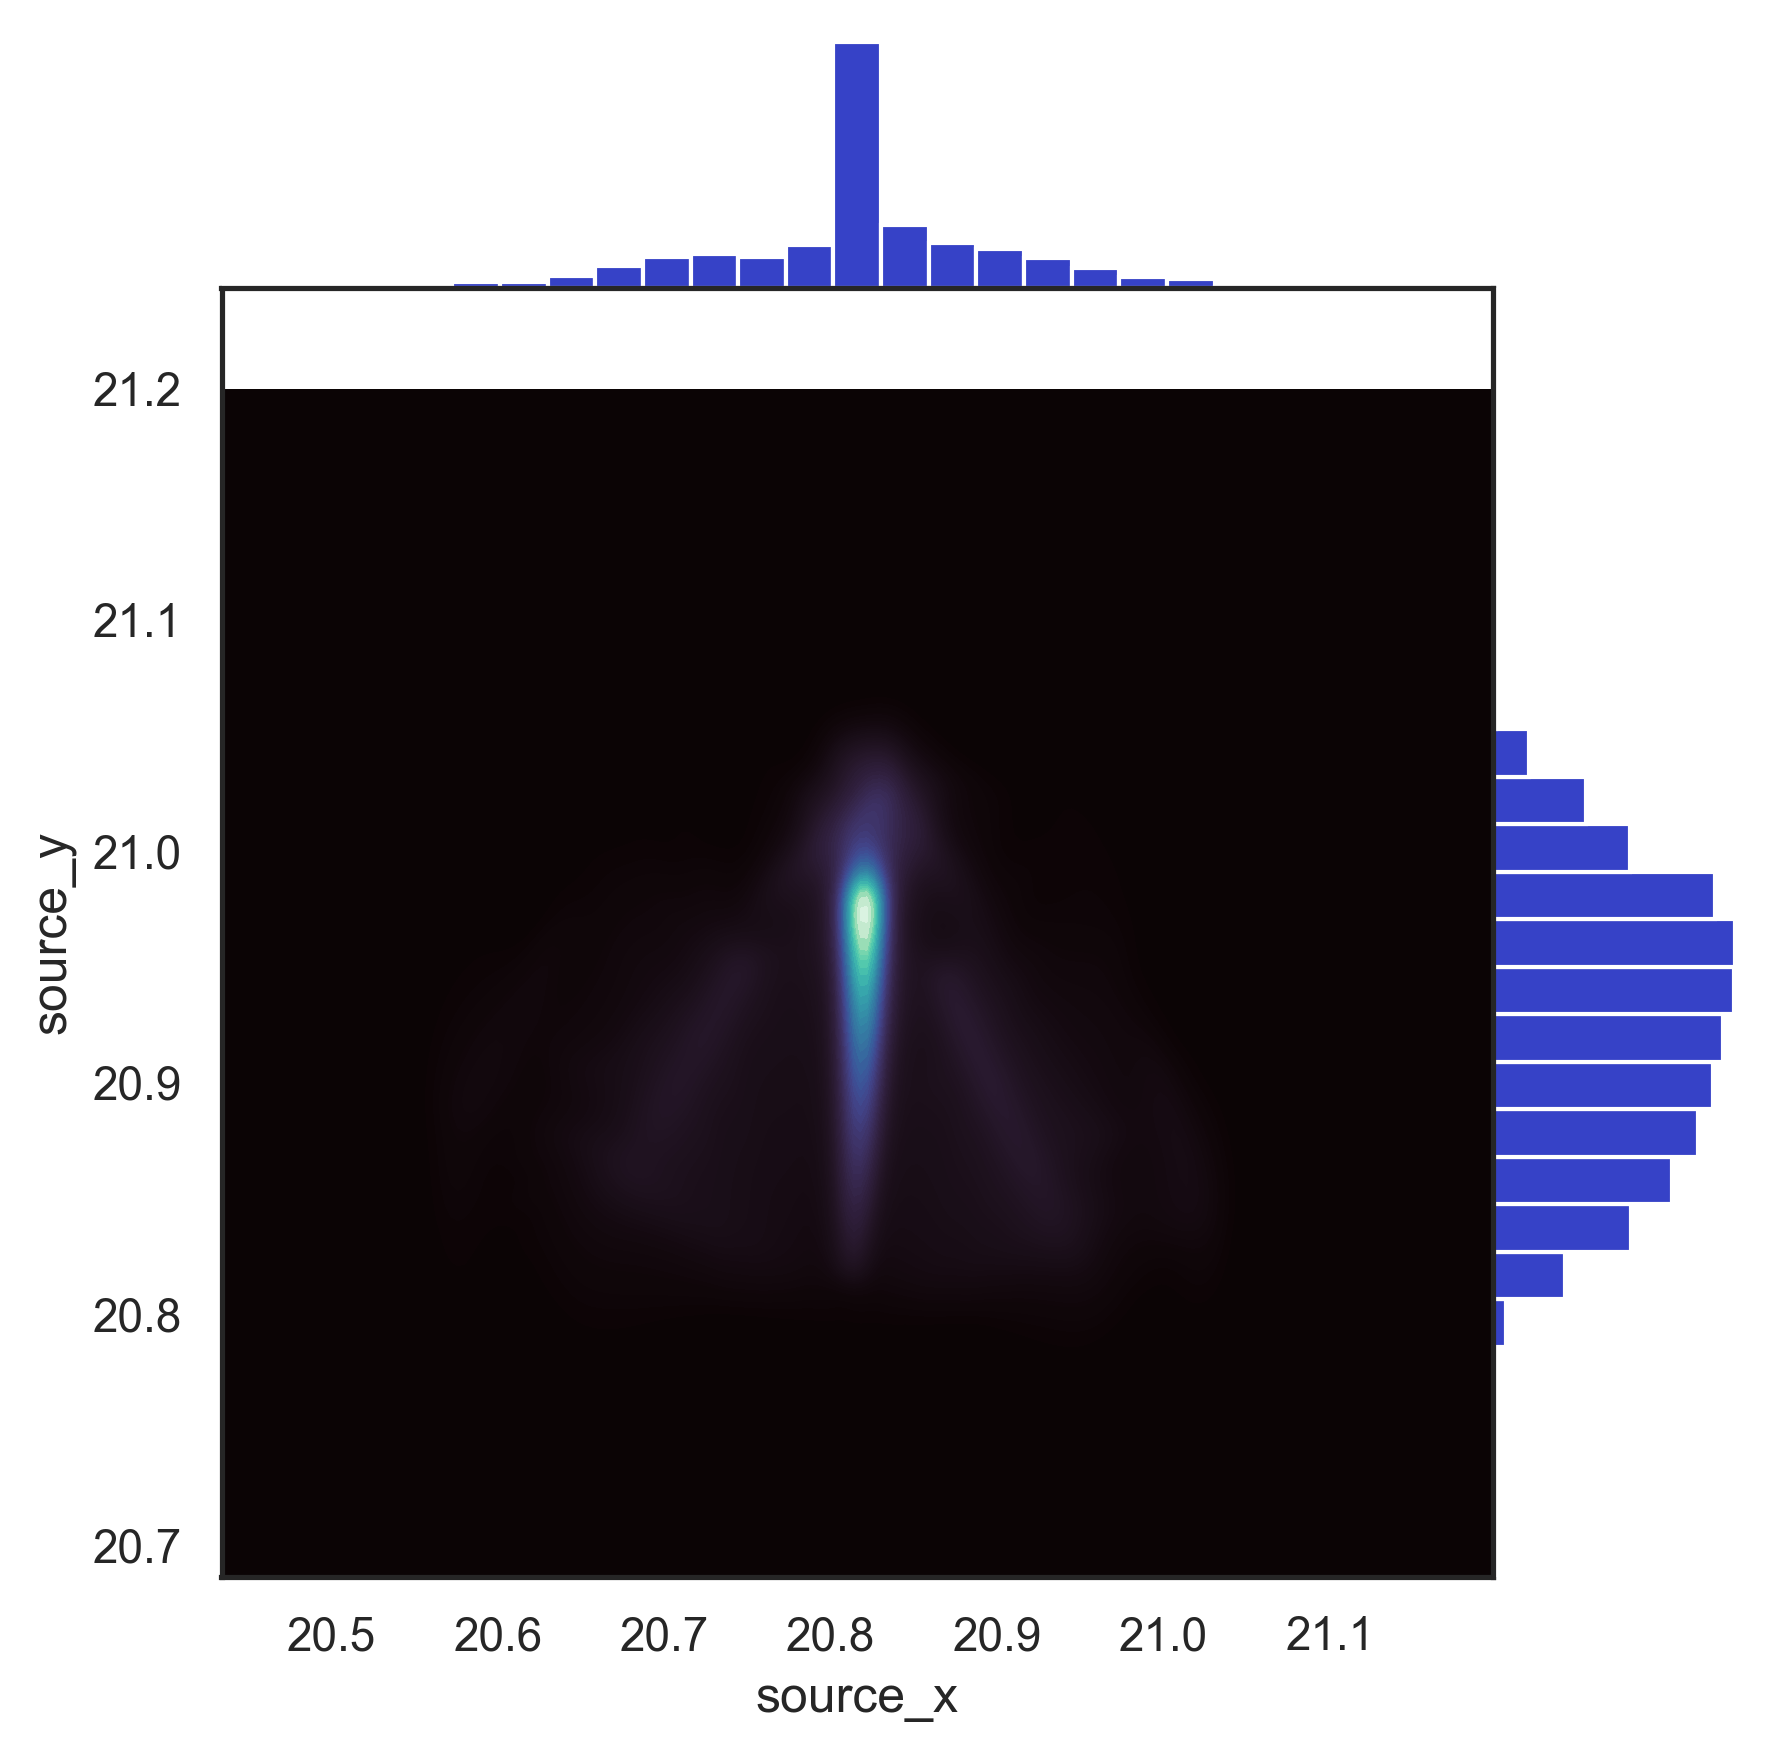

In [20]:
# Source X Joint Grid
sns.set_theme(style="white")
g = sns.JointGrid(data=sie, x="source_x", y="source_y", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((20.2, 21.2), (20.2, 21.2)),
             thresh=0, levels=100, cmap="mako")
g.plot_marginals(sns.histplot, color="#3642C7", alpha=1, bins=25)

In [64]:
mask_sie = sie[sie['pos_rms'] < 0.1]
mask_pow = pow[pow['pos_rms'] < 0.1]
mask_nfw = nfw[nfw['pos_rms'] < 0.1]
mask_nfw

,m,n,o,num_images,pos_rms,mag_rms,chi2,M,x,y,e,$θ_{e}$,c or $r_{s}$,NaN,source_x,source_y
0,20.0,0.00000,0.00000,1,0.015992,5.207995e+07,584.3345,2.572966e+12,20.80809,20.77544,0.00000,0.00000,20.0,0.0,20.80809,20.77544
1,20.0,0.00000,3.63636,1,0.015992,5.207994e+07,584.3345,2.572966e+12,20.80809,20.77544,0.00000,3.63636,20.0,0.0,20.80809,20.77544
2,20.0,0.00000,7.27273,1,0.015992,5.207994e+07,584.3345,2.572966e+12,20.80809,20.77544,0.00000,7.27273,20.0,0.0,20.80809,20.77544
3,20.0,0.00000,10.90909,1,0.015992,5.207993e+07,584.3345,2.572966e+12,20.80809,20.77544,0.00000,10.90909,20.0,0.0,20.80809,20.77544
4,20.0,0.00000,14.54545,1,0.015992,5.207995e+07,584.3345,2.572966e+12,20.80809,20.77544,0.00000,14.54545,20.0,0.0,20.80809,20.77544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997622,100.0,0.69091,87.27273,5,0.077838,6.405525e+00,33006.4200,2.091806e+11,20.85034,20.87553,0.69091,87.27273,100.0,0.0,20.82663,20.71920
997625,100.0,0.69091,80.00000,5,0.091846,6.323425e+00,46352.7800,2.062474e+11,20.82794,20.88524,0.69091,80.00000,100.0,0.0,20.77945,20.72654
997673,100.0,0.69091,269.09091,5,0.081483,6.372575e+00,37078.4100,2.081733e+11,20.85308,20.88313,0.69091,269.09090,100.0,0.0,20.83694,20.72171
997675,100.0,0.69091,261.81818,5,0.084126,6.382150e+00,38957.9000,2.073988e+11,20.83069,20.87811,0.69091,261.81820,100.0,0.0,20.78953,20.72360


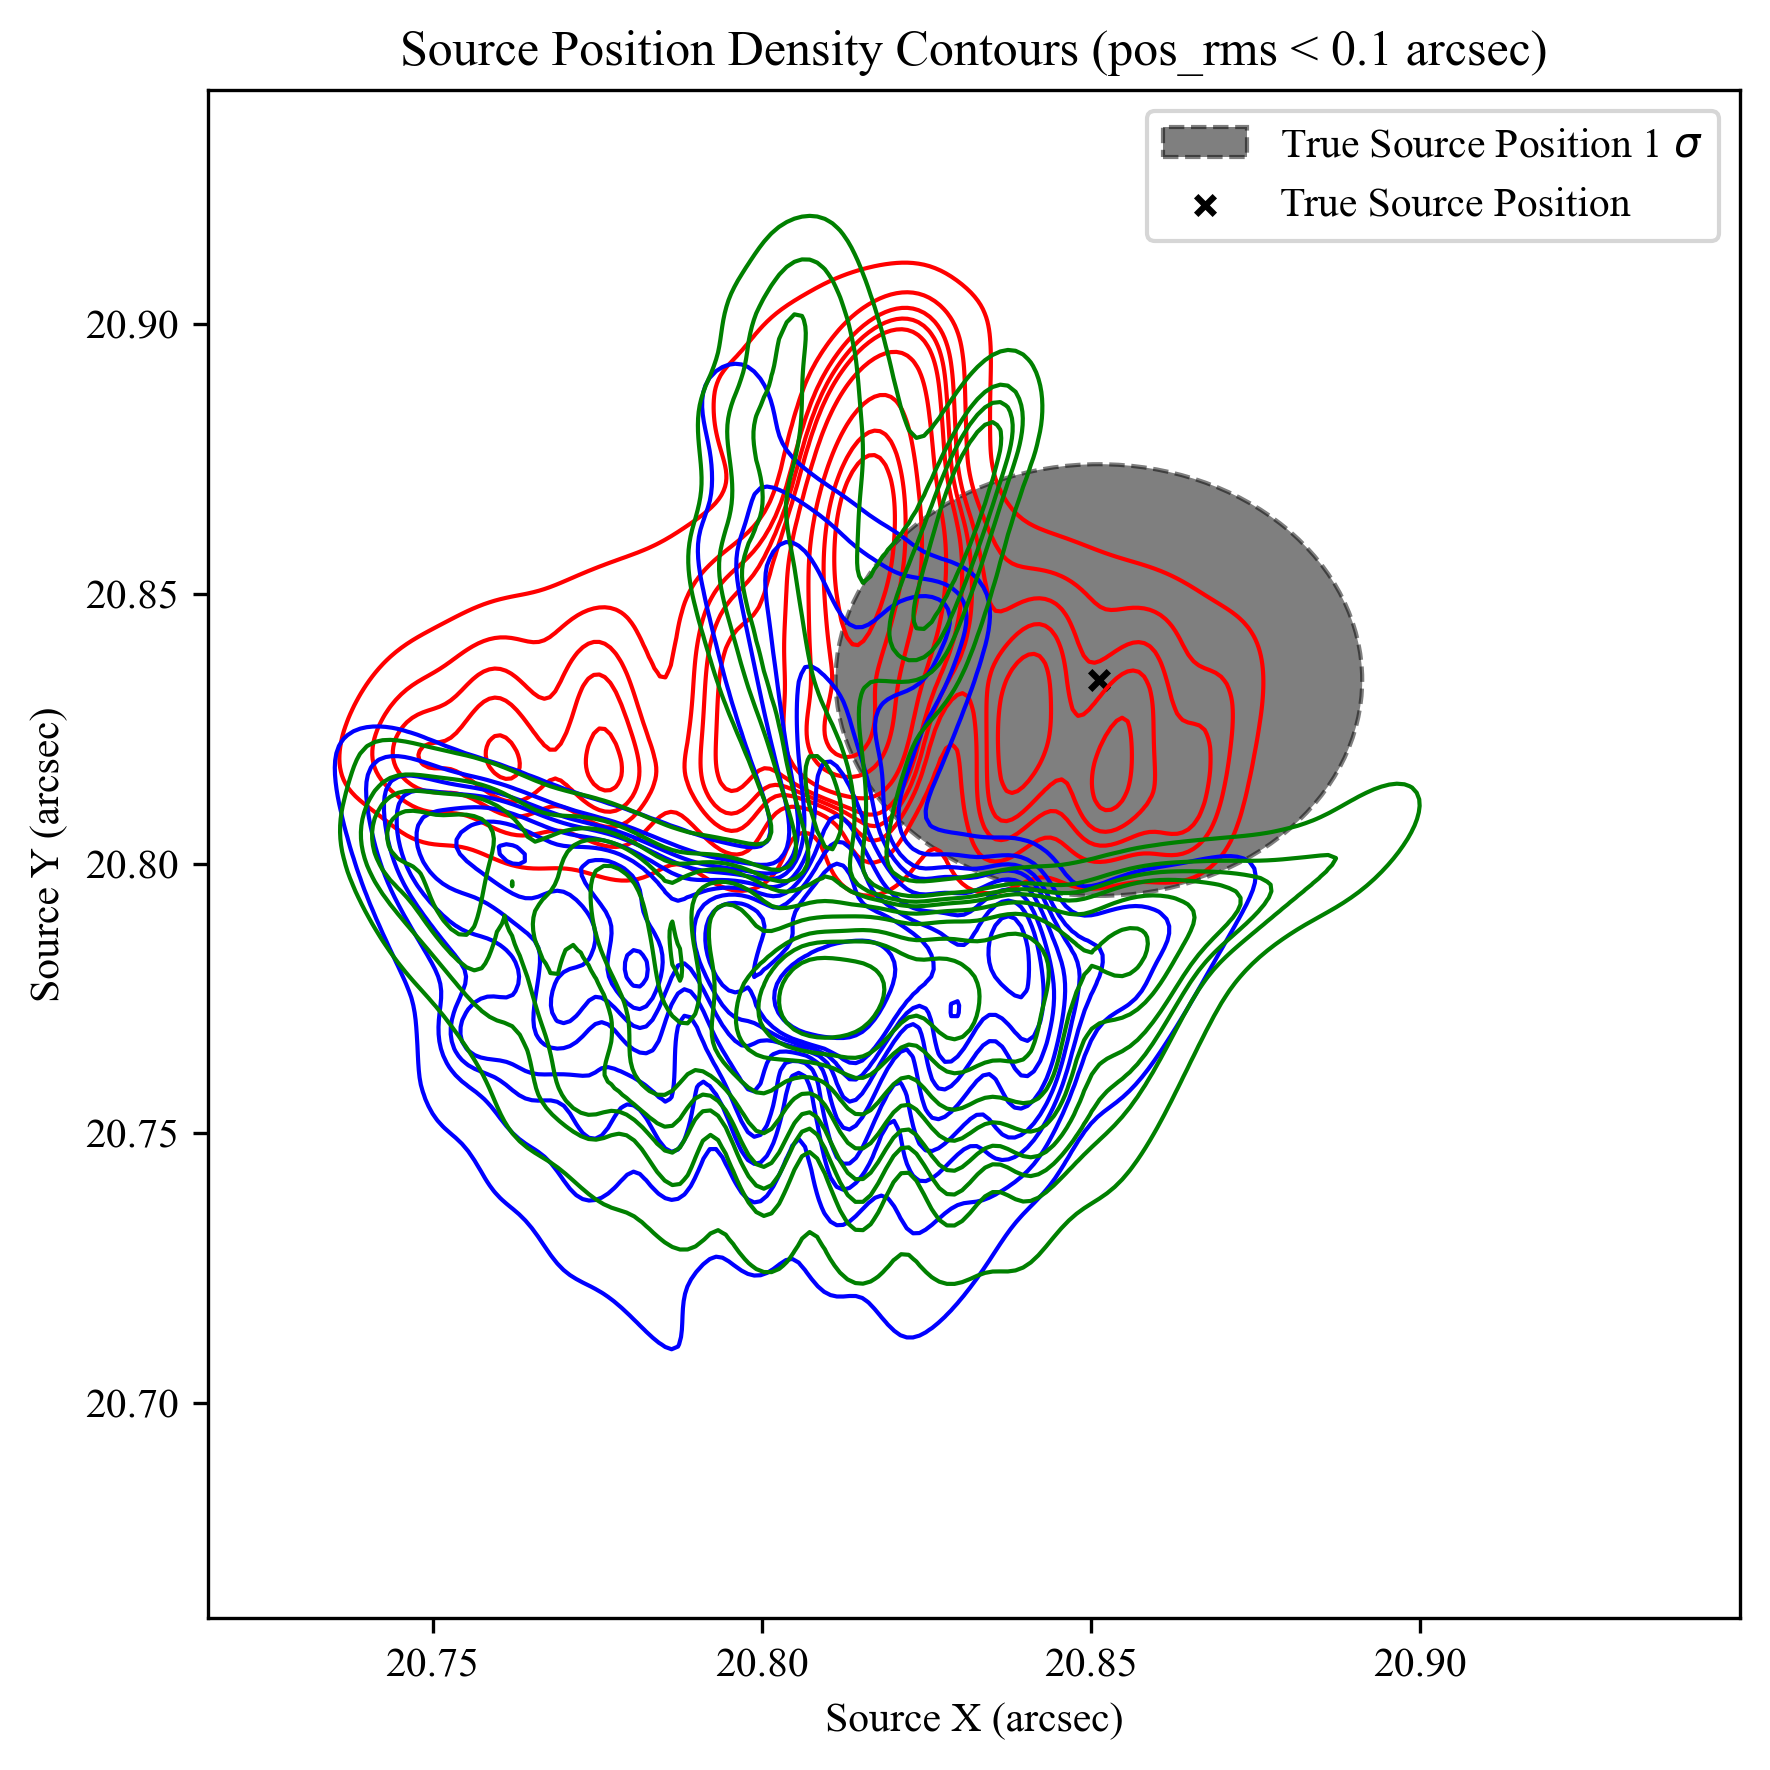

In [45]:
f, ax = plt.subplots(figsize=(6, 6))
# sns.scatterplot(x=sie['source_x'], y=sie['source_y'], s=1, color=".15")
# sns.histplot(x=sie['source_x'], y=sie['source_y'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=mask_sie['source_x'], y=mask_sie['source_y'], levels=10, color="r", linewidths=1, label='SIE')
sns.kdeplot(x=mask_pow['source_x'], y=mask_pow['source_y'], levels=10, color="b", linewidths=1, label='POW')
sns.kdeplot(x=mask_nfw['source_x'], y=mask_nfw['source_y'], levels=10, color="g", linewidths=1, label='NFW')
circle = plt.Circle((20.8512217, 20.8340052), 0.04, color='black', fill=True, linestyle='--', linewidth=1, alpha=0.5, label='True Source Position 1 $\sigma$')
ax.add_artist(circle)
plt.scatter(20.8512217, 20.8340052, color='black', s=20, marker='x', label='True Source Position')
plt.legend()
plt.xlabel('Source X (arcsec)')
plt.ylabel('Source Y (arcsec)')
plt.title('Source Position Density Contours (pos_rms < 0.1 arcsec)')
plt.tight_layout()
plt.show()
# sns.kdeplot(x=sie['source_x'], y=sie['source_y'], fill=True, thresh=0, levels=100, cmap="mako")

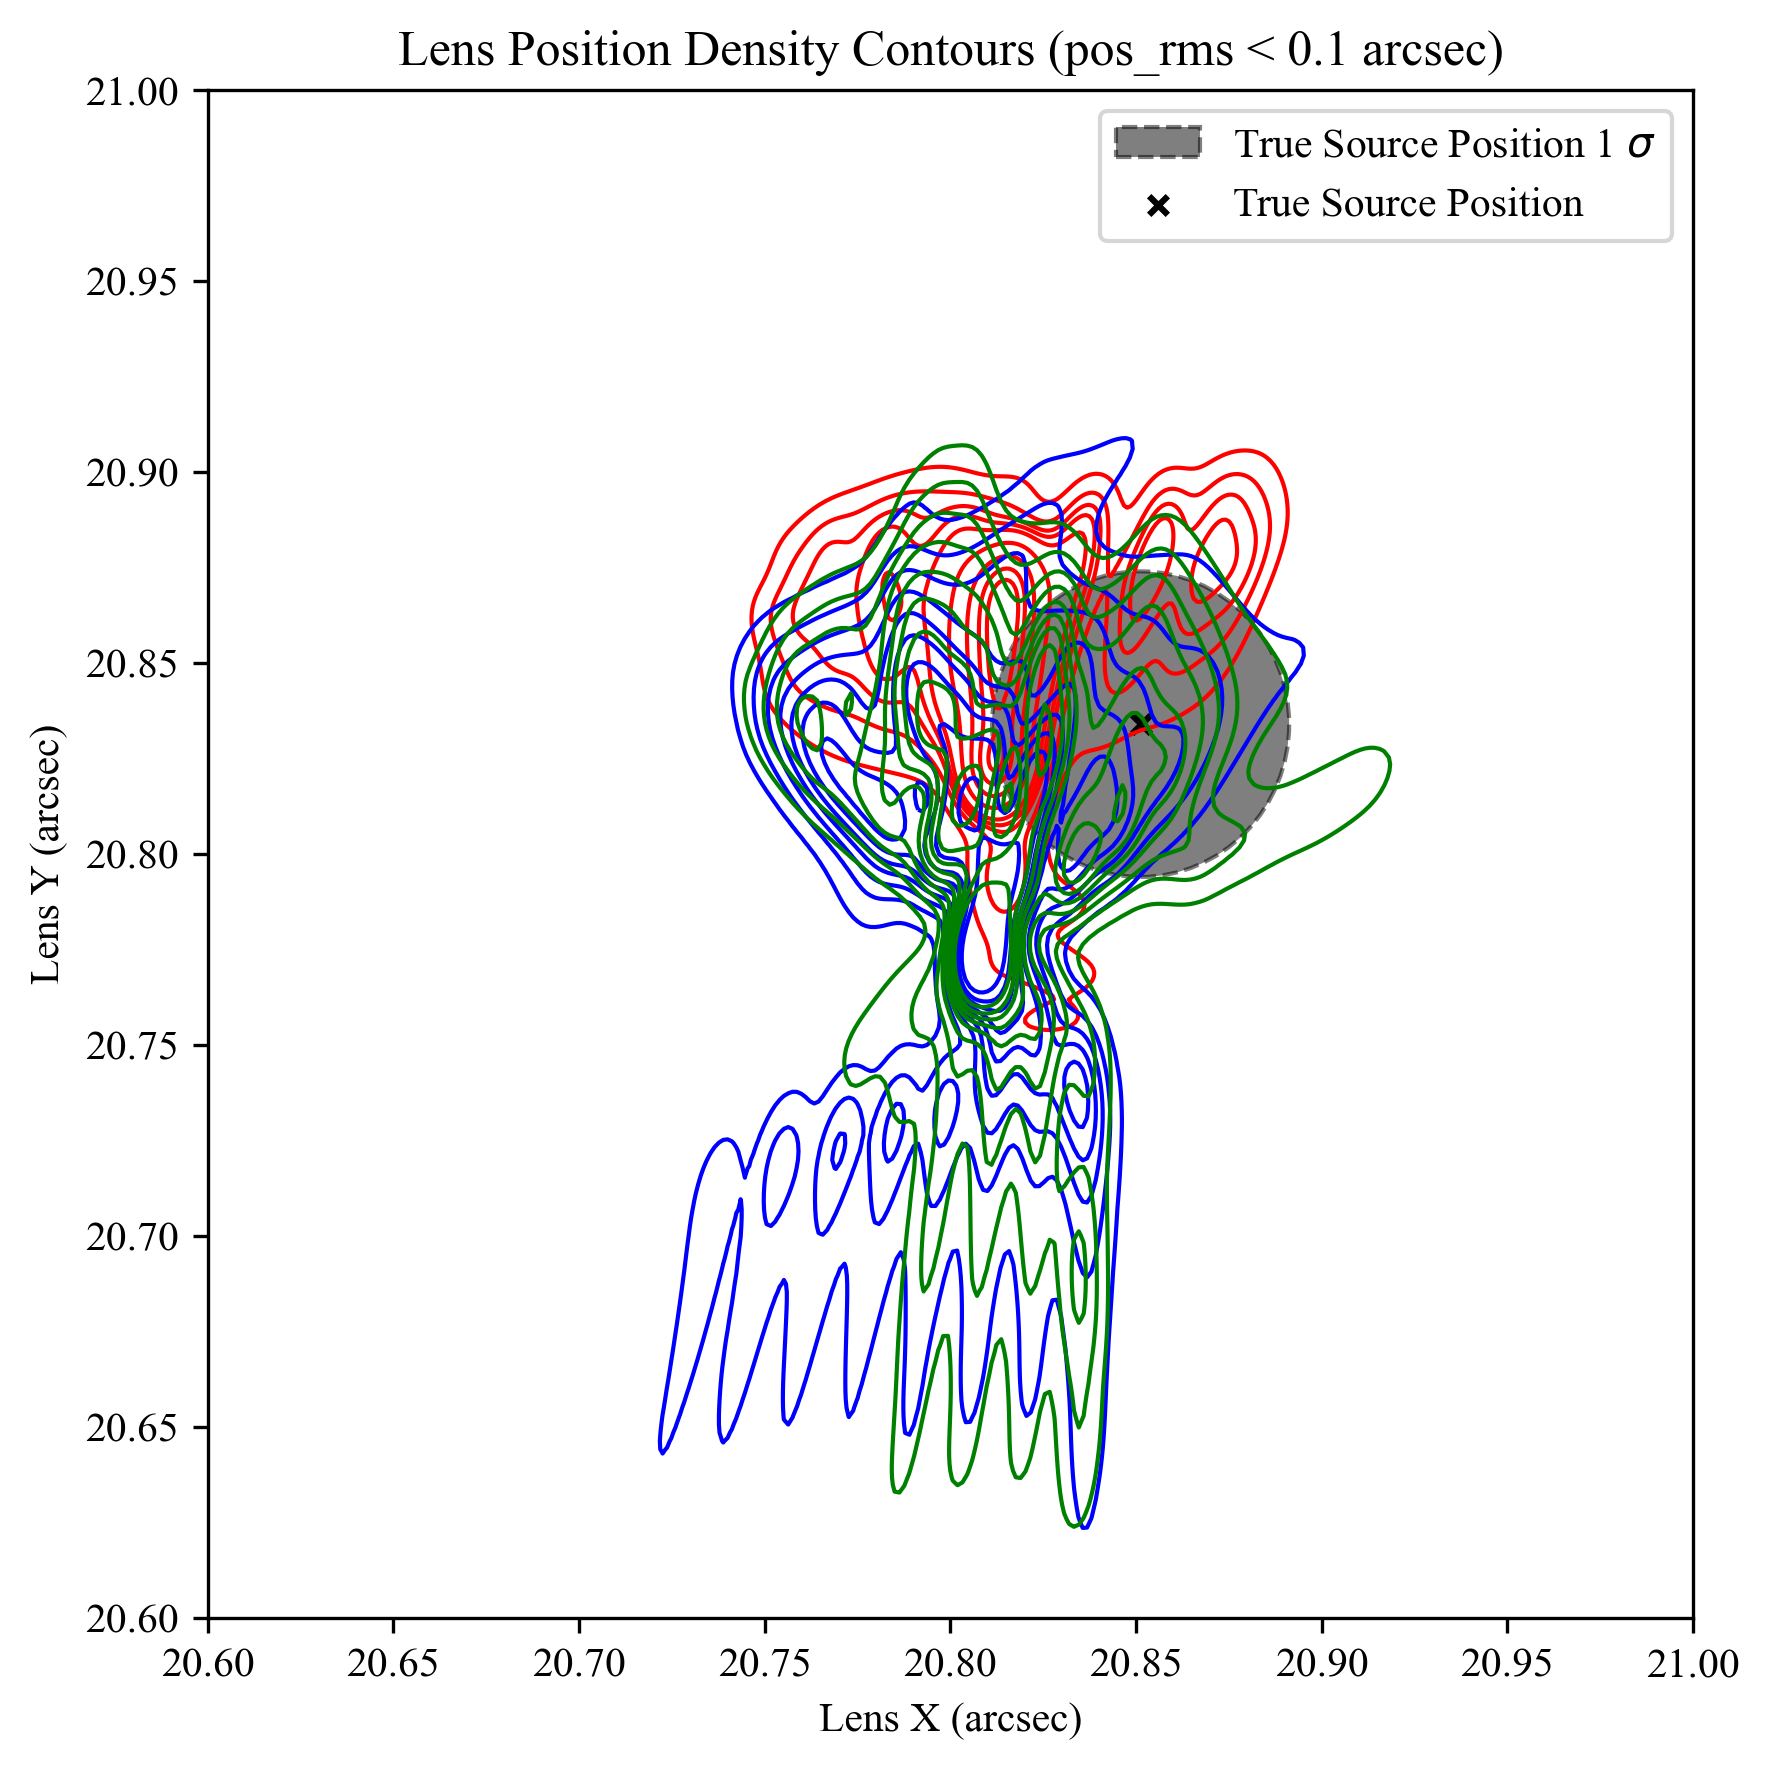

In [66]:
f, ax = plt.subplots(figsize=(6, 6))
# sns.scatterplot(x=sie['source_x'], y=sie['source_y'], s=1, color=".15")
# sns.histplot(x=sie['source_x'], y=sie['source_y'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=mask_sie['x'], y=mask_sie['y'], levels=10, color="r", linewidths=1, label='SIE')
sns.kdeplot(x=mask_pow['x'], y=mask_pow['y'], levels=10, color="b", linewidths=1, label='POW')
sns.kdeplot(x=mask_nfw['x'], y=mask_nfw['y'], levels=10, color="g", linewidths=1, label='NFW')
circle = plt.Circle((20.8512217, 20.8340052), 0.04, color='black', fill=True, linestyle='--', linewidth=1, alpha=0.5, label='True Source Position 1 $\sigma$')
ax.add_artist(circle)
plt.scatter(20.8512217, 20.8340052, color='black', s=20, marker='x', label='True Source Position')
plt.legend()
plt.xlabel('Lens X (arcsec)')
plt.ylabel('Lens Y (arcsec)')
plt.xlim(20.60, 21.0)
plt.ylim(20.60, 21.0)
plt.title('Lens Position Density Contours (pos_rms < 0.1 arcsec)')
plt.tight_layout()
plt.show()
# sns.kdeplot(x=sie['source_x'], y=sie['source_y'], fill=True, thresh=0, levels=100, cmap="mako")

In [62]:
# Create a directory for the frames
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

# Get unique sorted values of 'e'
e_values = sorted(sie['e'].unique())

# Generate a plot for each value of 'e' and save it
for i, e in enumerate(e_values):
    mask_sie = sie[sie['e'] == e]
    mask_pow = pow[pow['e'] == e]
    mask_nfw = nfw[nfw['e'] == e]

    plt.figure(figsize=(8, 4))
    # Use a fixed range for the histogram bins for consistency across frames
    plt.hist(mask_sie['chi2'], bins=30, alpha=0.5, label='SIE', range=(0, 0.5e6))
    plt.hist(mask_pow['chi2'], bins=30, alpha=0.5, label='POW', range=(0, 0.5e6))
    plt.hist(mask_nfw['chi2'], bins=30, alpha=0.5, label='NFW', range=(0, 0.5e6))

    plt.xlabel('Chi2')
    plt.ylabel('Count')
    plt.title(f'Chi2 Distribution for e={e:.1f}')
    plt.legend()
    plt.grid(True, alpha=0.2)
    # Set a fixed y-axis limit for animation stability
    plt.ylim(0, 5000)
    plt.tight_layout()
    
    # Save frame
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(e_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("chi2_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')


MoviePy - Building video chi2_animation.mp4.
MoviePy - Writing video chi2_animation.mp4



MoviePy - Done !
MoviePy - video ready chi2_animation.mp4


In [37]:
# Create a directory for the frames
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

# Get unique sorted values of 'e'
e_values = sorted(sie['e'].unique())

# Generate a plot for each value of 'e' and save it
for i, e in enumerate(e_values):
    mask_sie = sie[sie['e'] == e]
    mask_pow = pow[pow['e'] == e]
    mask_nfw = nfw[nfw['e'] == e]

    plt.figure(figsize=(8, 4))
    # Use a fixed range for the histogram bins for consistency across frames
    sns.kdeplot(mask_sie['pos_rms'], label='SIE', fill=True, alpha=0.5)
    sns.kdeplot(mask_pow['pos_rms'], label='POW', fill=True, alpha=0.5)
    sns.kdeplot(mask_nfw['pos_rms'], label='NFW', fill=True, alpha=0.5)

    plt.xlabel('Position RMS (arcsec)')
    plt.ylabel('Count')
    plt.title(f'Position RMS Distribution for e={e:.1f}')
    plt.legend()
    plt.grid(True, alpha=0.2)
    # Set a fixed y-axis limit for animation stability
    plt.ylim(0, 8)
    plt.xlim(0, 1.0)
    plt.tight_layout()
    
    # Save frame
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(e_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("pos_rms_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')


MoviePy - Building video pos_rms_animation.mp4.
MoviePy - Writing video pos_rms_animation.mp4



MoviePy - Done !
MoviePy - video ready pos_rms_animation.mp4


In [39]:
# Create a directory for the frames
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

# Get unique sorted values of 'e'
e_values = sorted(sie['$θ_{e}$'].unique())

# Generate a plot for each value of 'e' and save it
for i, e in enumerate(e_values):
    mask_sie = sie[sie['$θ_{e}$'] == e]
    mask_pow = pow[pow['$θ_{e}$'] == e]
    mask_nfw = nfw[nfw['$θ_{e}$'] == e]

    plt.figure(figsize=(8, 4))
    # Use a fixed range for the histogram bins for consistency across frames
    sns.kdeplot(mask_sie['pos_rms'], label='SIE', fill=True, alpha=0.5)
    sns.kdeplot(mask_pow['pos_rms'], label='POW', fill=True, alpha=0.5)
    sns.kdeplot(mask_nfw['pos_rms'], label='NFW', fill=True, alpha=0.5)

    plt.xlabel('Position RMS (arcsec)')
    plt.ylabel('Count')
    plt.title(f'Position RMS Distribution for $θ$ = {e:.1f}')
    plt.legend()
    plt.grid(True, alpha=0.2)  
    # Set a fixed y-axis limit for animation stability
    plt.ylim(0, 15)
    plt.xlim(0, 1.0)
    plt.tight_layout()
    
    # Save frame
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(e_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=5)
clip.write_videofile("pos_rms_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')


MoviePy - Building video pos_rms_animation.mp4.
MoviePy - Writing video pos_rms_animation.mp4



MoviePy - Done !
MoviePy - video ready pos_rms_animation.mp4


In [67]:
# Create a directory for the frames
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

# Get unique sorted values of 'e'
e_values = sorted(sie['e'].unique())
# e_values = [e for e in e_values if e < 0.70]

# Generate a plot for each value of 'e' and save it
for i, e in enumerate(e_values):
    mask_sie = sie[sie['e'] == e]
    mask_pow = pow[pow['e'] == e]
    mask_nfw = nfw[nfw['e'] == e]

    f, ax = plt.subplots(figsize=(6, 6))
    sns.kdeplot(x=mask_sie['x'], y=mask_sie['y'], levels=5, color="r", linewidths=1, label='SIE')
    sns.kdeplot(x=mask_pow['x'], y=mask_pow['y'], levels=5, color="b", linewidths=1, label='POW')
    sns.kdeplot(x=mask_nfw['x'], y=mask_nfw['y'], levels=5, color="g", linewidths=1, label='NFW')

    circle = plt.Circle((20.8512217, 20.8340052), 0.04, color='black', fill=True, linestyle='--', linewidth=1, alpha=0.5, label='True Source Position 1 $\sigma$')
    ax.add_artist(circle)
    
    plt.scatter(20.8512217, 20.8340052, color='black', s=20, marker='x', label='True Source Position')
    plt.legend()
    plt.xlabel('Lens X (arcsec)')
    plt.ylabel('Lens Y (arcsec)')
    plt.title(f'Lens Position Density Contours for e={e:.2f}')

    # Set fixed axis limits for animation stability
    plt.xlim(20.60, 21.0)
    plt.ylim(20.70, 21.2)
    
    plt.tight_layout()
    
    # Save frame
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(e_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("lens_pos_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')

MoviePy - Building video lens_pos_animation.mp4.
MoviePy - Writing video lens_pos_animation.mp4



MoviePy - Done !
MoviePy - video ready lens_pos_animation.mp4
